In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
df=pd.read_excel("D:\VIT\Projects\Six sigma\Project\df_hub.xlsx")
print("{} records".format(len(df)))
df.head()

269 records


,Shipment,Driver,HUB
0,1,D1,SOUTH
1,2,D1,SOUTH
2,3,D2,SOUTH
3,4,D3,SOUTH
4,5,D2,SOUTH


Visualisation of three drivers by means of opting northern or southern hub for shipment

In [3]:
SMALL_SIZE=8
MEDIUM_SIZE=18
BIGGER_SIZE=24

plt.rc('font',size=SMALL_SIZE)
plt.rc('axes',titlesize=BIGGER_SIZE)
plt.rc('axes',labelsize=BIGGER_SIZE)
plt.rc('xtick',labelsize=BIGGER_SIZE)
plt.rc('ytick',labelsize=BIGGER_SIZE)
plt.rc('legend',fontsize=MEDIUM_SIZE)
plt.rc('figure',titlesize=BIGGER_SIZE)

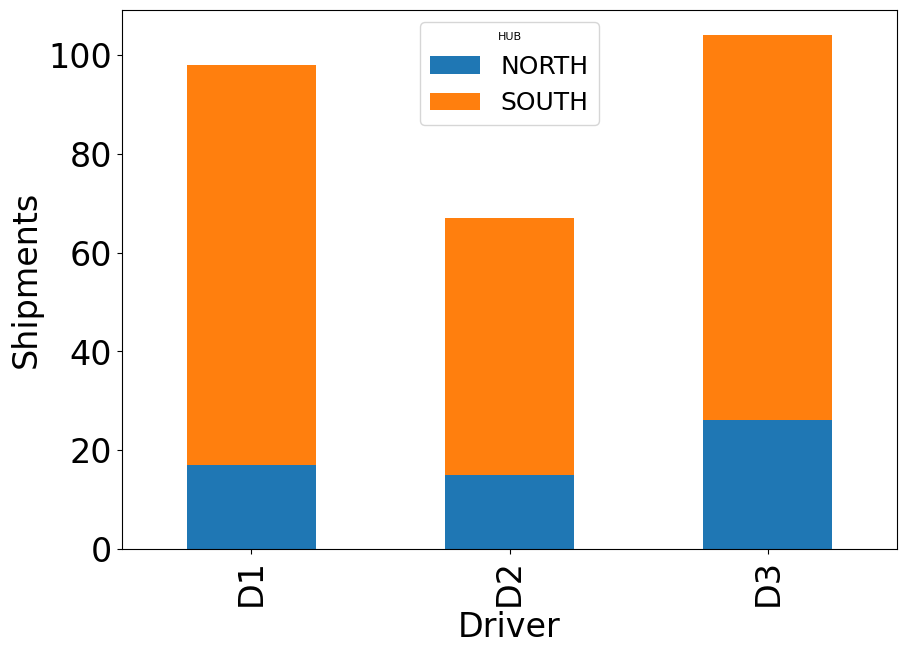

In [4]:
df_count=df.groupby(['Driver','HUB'])['Shipment'].count().unstack().fillna(0)
df_count.plot(figsize=(10,7),kind="bar",stacked=True)
plt.ylabel("Shipments")
plt.show()

Performing cross tabulation

In [5]:
df_xtab=pd.crosstab(df.HUB,df.Driver,rownames=['index'],colnames=['Driver'])
df_xtab['All']=df_xtab.sum(axis=1)

df_xtab.to_csv('df_cross_tab.csv')
df_xtab

Driver,D1,D2,D3,All
index,,,,
NORTH,17,15,26,58
SOUTH,81,52,78,211


In [6]:
#Percentage by Hub
df_hubperc=(100*df_xtab/df_xtab.sum(axis=0)).round(2)
df_hubperc.to_csv("df_hubperc.csv")
df_hubperc

Driver,D1,D2,D3,All
index,,,,
NORTH,17.35,22.39,25.0,21.56
SOUTH,82.65,77.61,75.0,78.44


Chi Square Test

In [8]:
from scipy.stats import chi2_contingency
data=[]
for col in ['D1','D2','D3']:
    data.append(df_xtab[col].values)
stat,p,dof,expected=chi2_contingency(data)
print("p-value:\t"+ str(p.round(2)))

p-value:	0.41
